# **Trabalho 2 - Introdução ao Processamento Digital de Imagens**
##Nome: Gabriela Jachs Stepien

#**Questão 2:**

Utilizado as técnicas de morfologia matemática (com as funções criadas por você), execute em python a filtragem dos círculos médios apontados na imagem “Fig0943” do capítulo 9 do livro texto do González. Plote, a imagem original e a imagem filtrada, uma ao lado da outra. Discuta qualitativamente o resultado de sua filtragem. 

[imagem](https://drive.google.com/file/d/1tmOUe6AIhWejk3Lkm4fyWaSmX3H6Yt9g/view?usp=sharing)

**As transformações morfológicas são algumas operações simples baseadas na forma da imagem. Normalmente é executado em imagens binárias. Ele precisa de duas entradas, uma é a nossa imagem original, a segunda é chamada de elemento estruturante ou kernel que decide a natureza da operação. Dois operadores morfológicos básicos são erosão e dilatação. Em seguida, suas formas variantes como abertura, fechamento, gradiente etc. Então, primeiramente, tivemos a imagem binarizada. Depois, foi feito a dilatação, onde um elemento de pixel é '1' se pelo menos um pixel sob o kernel for '1'. Portanto, aumenta a região branca na imagem ou o tamanho do objeto em primeiro plano, aumenta. Normalmente, em casos como remoção de ruído, a erosão é seguida de dilatação. Porque a erosão remove ruídos brancos, mas também encolhe nosso objeto. Então, nós dilatamos. Como o ruído acabou, eles não voltarão, mas nossa área de objeto aumenta. Também é útil para juntar partes quebradas de um objeto. A ideia básica de erosão é apenas como a erosão do solo, ela desgasta os limites do objeto em primeiro plano. O kernel desliza pela imagem (como na convolução 2D). Um pixel na imagem original (1 ou 0) será considerado 1 apenas se todos os pixels sob o kernel forem 1, caso contrário, ele é corroído (reduzido a zero). Foi usado a estruturante de '(30)' para conseguir mostrar justamente a parte dos pontos que foram apontados com as flechas, que é o que chamamos de máscara.**

##***Para baixar a imagem:***
[Fig0943](https://drive.google.com/file/d/1MXJmoovRBnIInXd5BxSGHUItWdVymgXb/view?usp=sharing)

##***Importação das bibliotecas:***

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import skimage.morphology

##***Código - Operações Morfológicas:***

##***Binarização:***

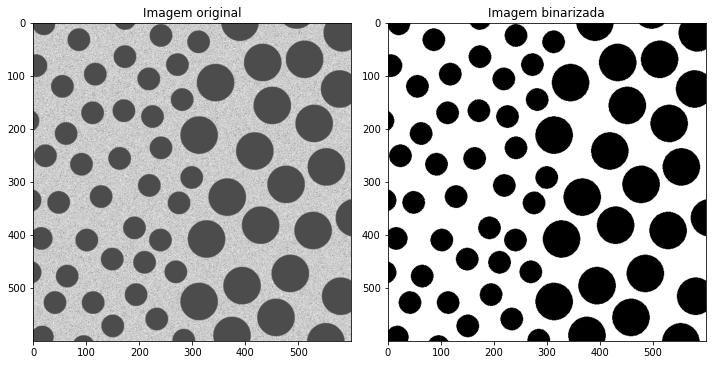

In [ ]:
img = cv2.imread('/content/Fig0943(a)(dark_blobs_on_light_background).tif', cv2.IMREAD_GRAYSCALE)
img_bin = img.copy()

threshold = 120
img_bin[img >= threshold] = 255
img_bin[img < threshold] = 0

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Imagem binarizada')
plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()

##***Dilatação:***

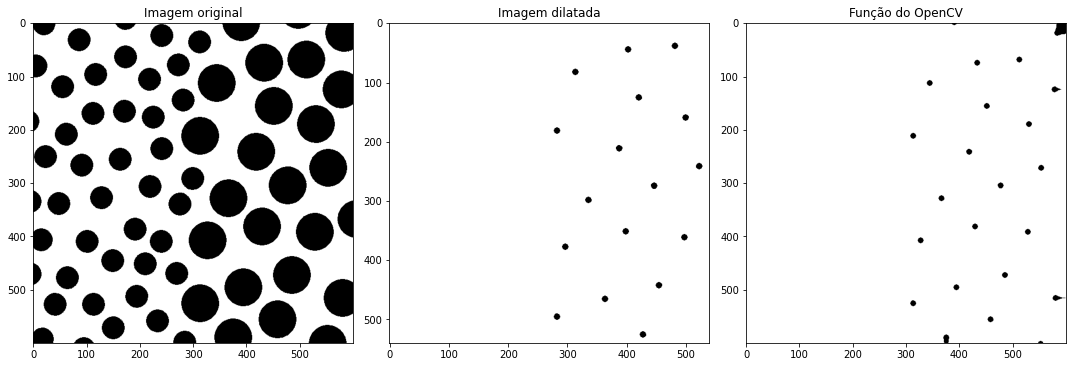

In [27]:
#estruturante = np.ones((33,33))

def dilatacao(img, s):
    borda = (s.shape[0]-1)//2
    altura, largura = img.shape
    max_bin = img.max()
    min_bin = img.min()
    img_saida = np.zeros((altura,largura))

    for x in range(borda, altura-borda):
        for y in range(borda, largura-borda):
            if np.sum(img[x-borda:x+borda+1, y-borda:y+borda+1]*s) != min_bin:
                img_saida[x,y] = max_bin

    return img_saida [borda: altura-borda, borda: largura-borda]
raio = 33
estruturante = skimage.morphology.disk(30)

img_dilatada = dilatacao(img_bin,estruturante)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.title('Imagem original')
plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.title('Imagem dilatada')
plt.imshow(img_dilatada, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.title('Função do OpenCV')
plt.imshow(cv2.dilate(img_bin, estruturante, iterations=1), cmap='gray', vmin=0, vmax=255)

plt.tight_layout()

##***Erosão:***

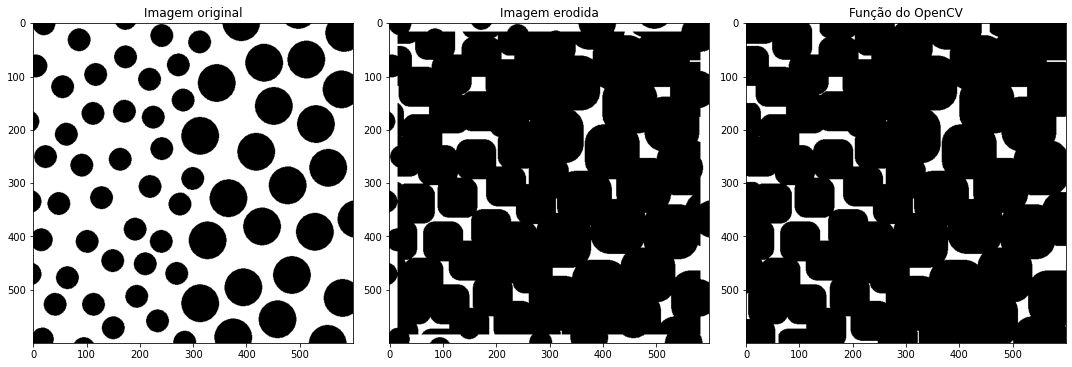

In [ ]:
estruturante = np.ones((33,33))

def erosao(img, s):
    borda = (s.shape[0]-1)//2
    altura, largura = img.shape
    img_saida = np.copy(img)

    for x in range(borda, altura-borda):
        for y in range(borda, largura-borda):
            if np.mean(img[x-borda:x+borda+1, y-borda:y+borda+1]*s) != 255:
                img_saida[x,y] = 0

    return img_saida

img_erodida = erosao(img_bin,estruturante)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.title('Imagem original')
plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.title('Imagem erodida')
plt.imshow(img_erodida, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.title('Função do OpenCV')
plt.imshow(cv2.erode(img_bin, estruturante, iterations=1), cmap='gray', vmin=0, vmax=255)

plt.tight_layout()

##***Dilatação:***

<Figure size 720x720 with 0 Axes>

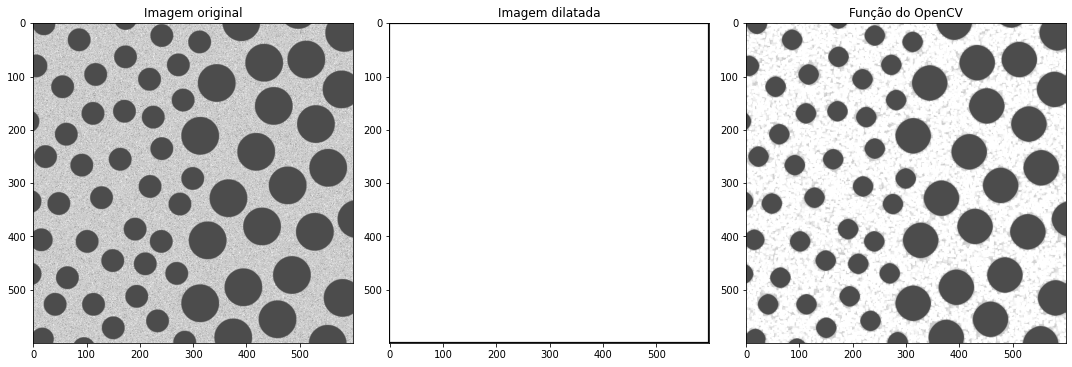

In [ ]:
img = cv2.imread('/content/Fig0943(a)(dark_blobs_on_light_background).tif', cv2.IMREAD_GRAYSCALE)
img_bin = img.copy()

plt.figure(figsize=(10,10))

img_dilatada = dilatacao(img_bin,estruturante)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.title('Imagem original')
plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.title('Imagem dilatada')
plt.imshow(img_dilatada, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.title('Função do OpenCV')
plt.imshow(cv2.dilate(img_bin, estruturante, iterations=1), cmap='gray', vmin=0, vmax=255)

plt.tight_layout()

<Figure size 720x720 with 0 Axes>

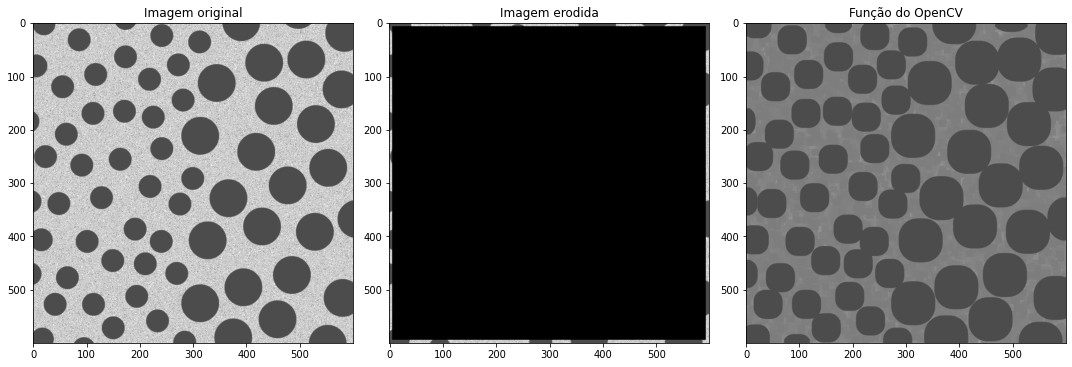

In [ ]:
img = cv2.imread('/content/Fig0943(a)(dark_blobs_on_light_background).tif', cv2.IMREAD_GRAYSCALE)
img_bin = img.copy()

plt.figure(figsize=(10,10))

estruturante = np.ones((13,13))

img_erodida = erosao(img_bin,estruturante)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.title('Imagem original')
plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.title('Imagem erodida')
plt.imshow(img_erodida, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.title('Função do OpenCV')
plt.imshow(cv2.erode(img_bin, estruturante, iterations=1), cmap='gray', vmin=0, vmax=255)

plt.tight_layout()

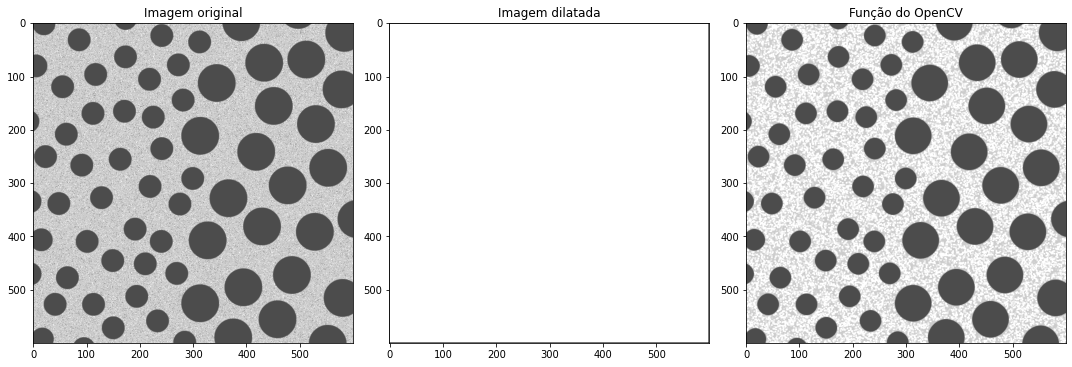

In [ ]:
img_texto = cv2.imread('/content/Fig0943(a)(dark_blobs_on_light_background).tif', cv2.IMREAD_GRAYSCALE)

estruturante = np.ones((3,3))

img_dilatada = dilatacao(img_texto, estruturante)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.title('Imagem original')
plt.imshow(img_texto, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.title('Imagem dilatada')
plt.imshow(img_dilatada, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.title('Função do OpenCV')
plt.imshow(cv2.dilate(img_texto, estruturante, iterations=1), cmap='gray', vmin=0, vmax=255)

plt.tight_layout()

<Figure size 720x720 with 0 Axes>

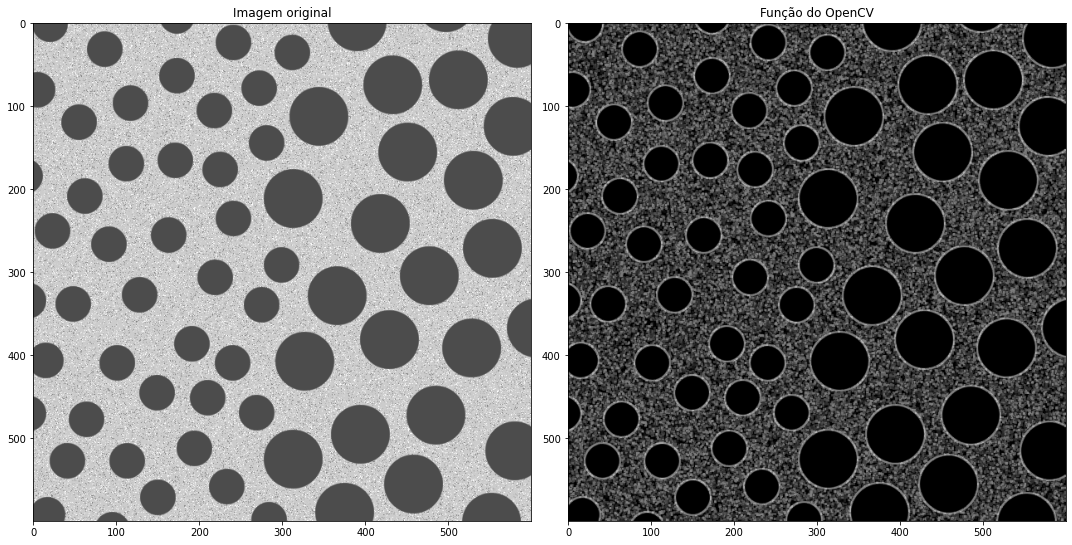

In [ ]:
img = cv2.imread('/content/Fig0943(a)(dark_blobs_on_light_background).tif', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))

estruturante = np.ones((3,3))

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Função do OpenCV')
plt.imshow(cv2.dilate(img, estruturante, iterations=1)-cv2.erode(img, estruturante, iterations=1), cmap='gray', vmin=0, vmax=255)

plt.tight_layout()